<a href="https://colab.research.google.com/github/eemayes2/IE517_F21_HWK7/blob/main/IE517_HWK7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#Check if any null values we need to change
def num_missing(x):
    return sum(x.isnull())

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Read in Data
df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/ccdefault.csv', header=0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##Ten-fold Cross-Validation

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
x = df.drop(columns = ['DEFAULT'])
y = df['DEFAULT']

kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

##Random Forest from Raschka Ch. 3

In [6]:
from sklearn.ensemble import RandomForestClassifier
#Grid Search takes too long, so just do it in a nested loop
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [11]:
kf.get_n_splits(x,y)
i = 1 
parameters = [10, 20, 50, 75, 100, 150, 200, 400]
out_of = []
in_of = []
acc_in = []
acc_out = []
in_mean = []

for param in parameters:
  forest = RandomForestClassifier(criterion = 'gini', n_estimators = param)
  print("For n_estimators = " + str(param))
  for train_index, test_index in kf.split(x,y):
    X_train, X_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    acc_out = accuracy_score(y_test, y_pred)
    out_of.append(acc_out)
    y_pred_train = forest.predict(X_train)
    acc_in = accuracy_score(y_train, y_pred_train)
    in_of.append(acc_in)
    print("\tFold Index:" + str(i) + "\n\t\tOut of Sample Accuracy: " + str(acc_out))
    print("\t\tIn Sample Accuracy: " + str(acc_in))
    i += 1
  in_mean.append(np.mean(acc_in))
  print("Mean In-Sample Accuracy for " + str(param) + " n_estimators: " + str(np.mean(acc_in)))
  i = 1

For n_estimators = 10
	Fold Index:1
		Out of Sample Accuracy: 0.7993333333333333
		In Sample Accuracy: 0.9801111111111112
	Fold Index:2
		Out of Sample Accuracy: 0.8216666666666667
		In Sample Accuracy: 0.9805925925925926
	Fold Index:3
		Out of Sample Accuracy: 0.805
		In Sample Accuracy: 0.9805185185185186
	Fold Index:4
		Out of Sample Accuracy: 0.816
		In Sample Accuracy: 0.980925925925926
	Fold Index:5
		Out of Sample Accuracy: 0.802
		In Sample Accuracy: 0.9794074074074074
	Fold Index:6
		Out of Sample Accuracy: 0.8116666666666666
		In Sample Accuracy: 0.9803333333333333
	Fold Index:7
		Out of Sample Accuracy: 0.797
		In Sample Accuracy: 0.9818888888888889
	Fold Index:8
		Out of Sample Accuracy: 0.809
		In Sample Accuracy: 0.9798888888888889
	Fold Index:9
		Out of Sample Accuracy: 0.8046666666666666
		In Sample Accuracy: 0.9800740740740741
	Fold Index:10
		Out of Sample Accuracy: 0.8053333333333333
		In Sample Accuracy: 0.9821851851851852
Mean In-Sample Accuracy for 10 n_estimators

In [12]:
#Print in-sample accuracies for each model type
print(in_mean)

[0.9821851851851852, 0.9932222222222222, 0.9994074074074074, 0.9999629629629629, 1.0, 1.0, 1.0, 1.0]


[0.0723393  0.05204395 0.01085784 0.01853991 0.0122156  0.05601438
 0.09438701 0.04177386 0.02788596 0.02409151 0.02087141 0.01895116
 0.05592564 0.05026756 0.04853628 0.04661175 0.04554953 0.04644812
 0.0465206  0.04448248 0.0428961  0.0405147  0.04030299 0.04197236]
 1) PAY_2                          0.094387
 2) LIMIT_BAL                      0.072339
 3) PAY_0                          0.056014
 4) BILL_AMT2                      0.055926
 5) SEX                            0.052044
 6) BILL_AMT3                      0.050268
 7) BILL_AMT4                      0.048536
 8) BILL_AMT5                      0.046612
 9) PAY_AMT2                       0.046521
10) PAY_AMT1                       0.046448
11) BILL_AMT6                      0.045550
12) PAY_AMT3                       0.044482
13) PAY_AMT4                       0.042896
14) DEFAULT                        0.041972
15) PAY_3                          0.041774
16) PAY_AMT5                       0.040515
17) PAY_AMT6               

(-1.0, 24.0)

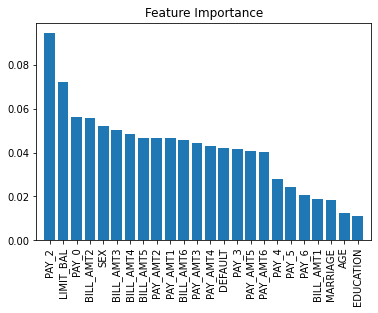

In [17]:
forest_best = RandomForestClassifier(n_estimators = 75, random_state = 1)
forest_best.fit(X_train, y_train)
importances = forest_best.feature_importances_
print(importances)
indices = np.argsort(importances)[: :-1]
feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]]) 

In [18]:
print("My name is Emma Mayes")
print("My NetID is: eemayes2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Emma Mayes
My NetID is: eemayes2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [19]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('IE517_HWK7.ipynb')

--2021-10-08 22:24:12--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-10-08 22:24:12 (36.6 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IE517_HWK7.ipynb to pdf
[NbConvertApp] Support files will be in IE517_HWK7_files/
[NbConvertApp] Making directory ./IE517_HWK7_files
[NbConvertApp] Writing 47686 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'